# Отток клиентов из сети фитнес клубов
В сети фитнес клубов столкнулись с проблемой оттока клиентов. Люди покупают абонемент, начинают посещать клуб и через какое-то время бросают. В последствии бизнес теряет деньги.
# Цель:
Выявить, что влияет на отток, составив портрет клиента и научиться выявлять на ранних стадиях потенциальный случай ухода. Дать рекомендации, как работать с такими клиентами, чтобы бизнес меньше терял потенциальных доходов.
# Описание данных:
 Предоставлены данные, за месяц до оттока и сам факт оттока. Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

Текущие поля в датасете:

Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

##  1. Загрузка  и предобработка данных


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

try:
    df = pd.read_csv('E:/Python/Project 9/gym_churn.csv') 
except:
    df = pd.read_csv('/datasets/gym_churn.csv')

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [2]:
# Для удобства приведем название всех колонок к нижнему регистру
df.columns = df.columns.str.lower()
# Строку month_to_end_contract переведем в цеочисленный тип 
df['month_to_end_contract'] = df['month_to_end_contract'].astype('int')
# Проверим дубликаты
df.duplicated().sum()

0

## 2. Исследовательский анализ данных (EDA)
### 2.1 Средние значения и стандартные отклонения

In [3]:
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


ВЫВОД:

- Обнаружены большие отличия между стандартыми отклонениями по параметрам. Перед обучением моделей необходима стандартизация данных.
- Не обнаружено различий по полу.
- Треть клиентов приведена знакомыми.
- Почти все посетители оставили номер телефона.
- Около 85% пользователей живут или работают в этом же районе. 
- Средняя частота посещений падает за время абонимента. 
- Отток клиентов в текущем месяце составил более 26%.

### 2.2 Группировка средних значений 

In [4]:
df_mean = df.groupby('churn').mean()
df_mean

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


ВЫВОД:

Замечен интересный, но вполне логичный факт, большинство средних показателей признаков у попавших в отток значительно хуже, чем у оставшихся. Значит стоит обратить внимание на те признаки, где разрыв максимален. Это: avg_class_frequency_current_month, lifetime и group_visits.

### 2.3 Гистограммы и распределения признаков по группам

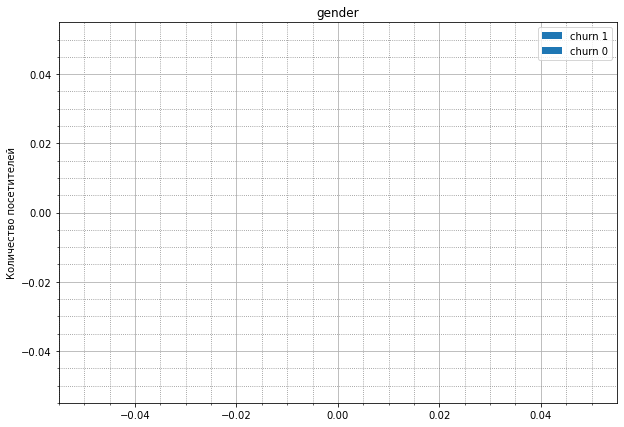

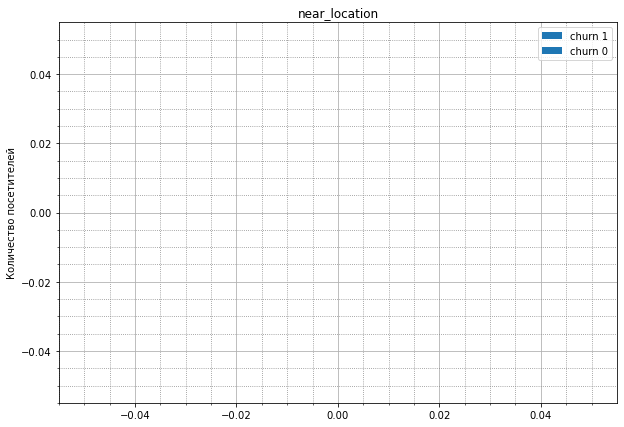

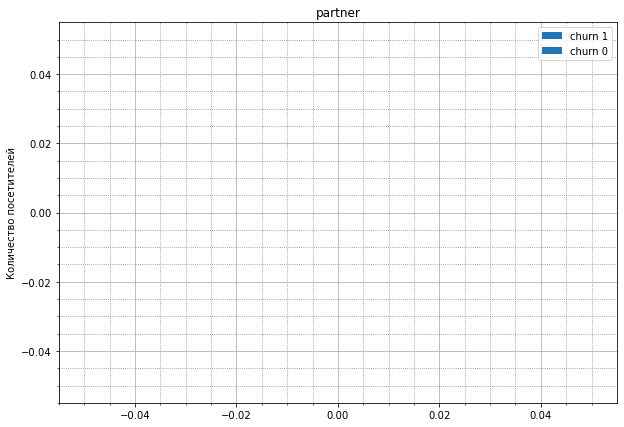

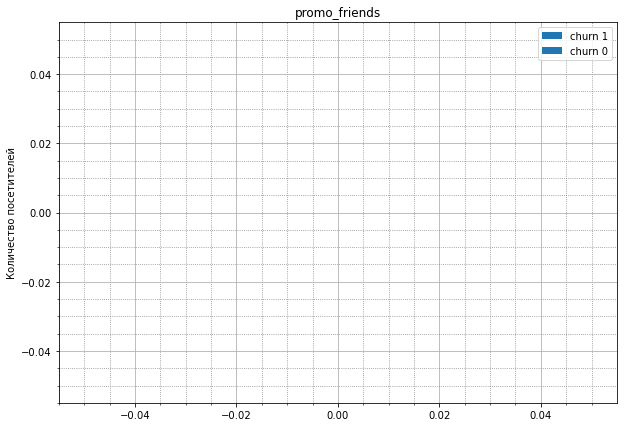

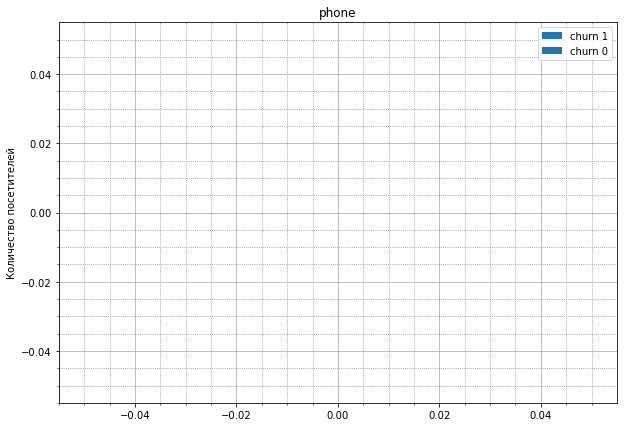

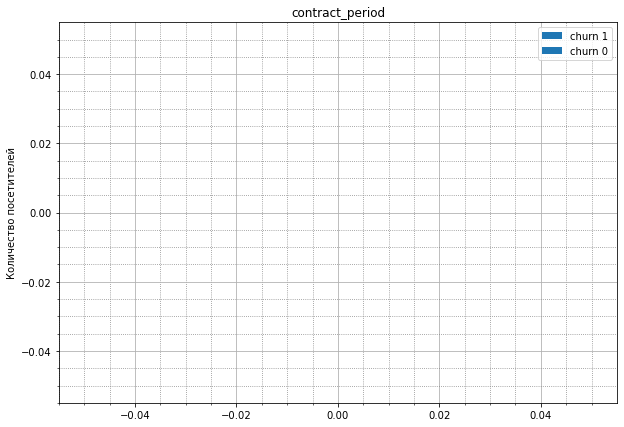

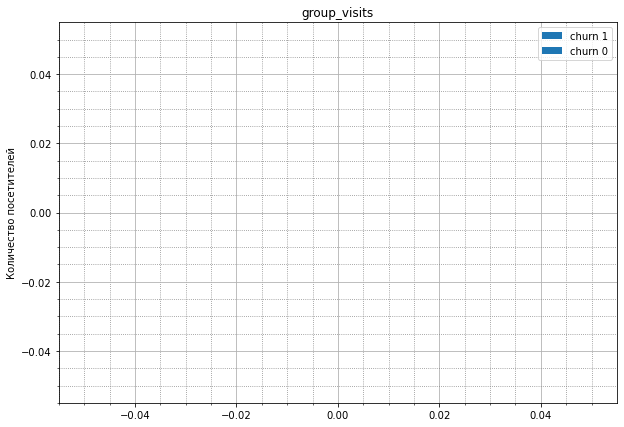

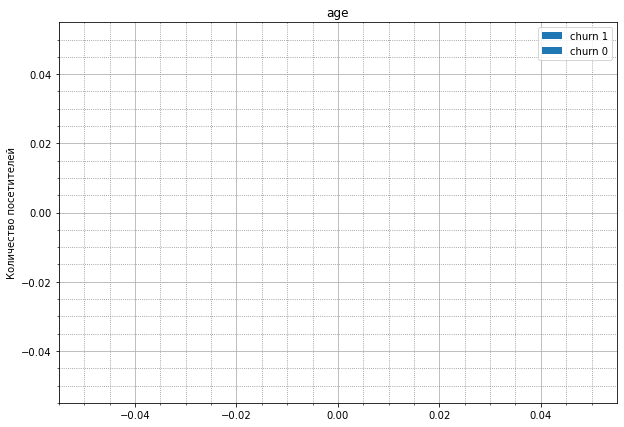

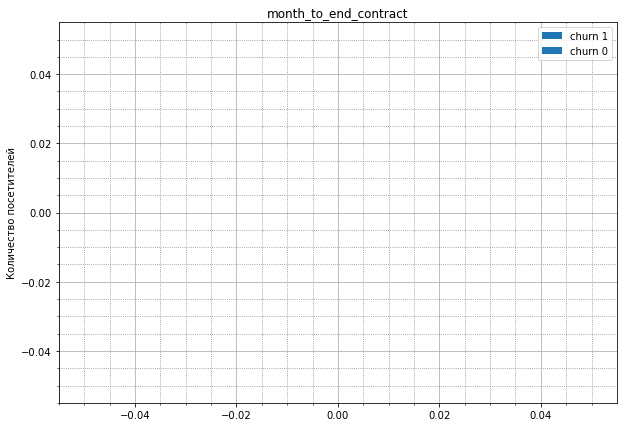

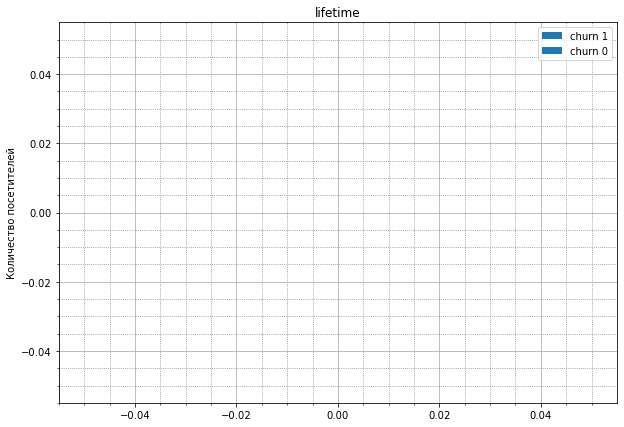

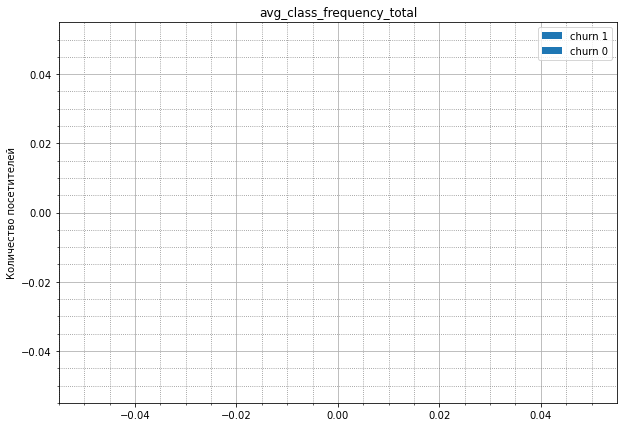

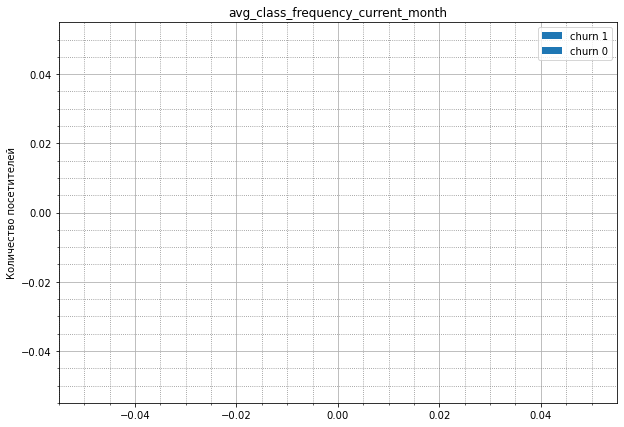

In [5]:
for colum_name in df_mean.columns[df_mean.columns!='avg_additional_charges_total']:
    bar_width = 0.3
    plt.figure(figsize=(10,7))
    churn = df.query('churn == "1"').groupby(colum_name)['churn'].count().reset_index()
    no_churn = df.query('churn == "0"').groupby(colum_name)['churn'].count().reset_index()
 
    plt.bar(churn[colum_name],churn['churn'], bar_width, label='churn 1')
    plt.bar(no_churn[colum_name] + bar_width,no_churn['churn'], bar_width, label='churn 0')
    plt.legend()
    plt.title(colum_name)
    plt.grid(which='major')
    plt.minorticks_on()
    plt.grid(which='minor',color = 'gray',linestyle = ':')
    plt.ylabel('Количество посетителей')
    plt.show;

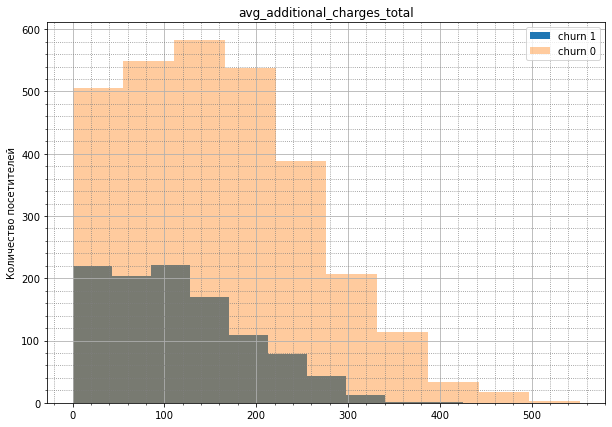

In [6]:
plt.figure(figsize=(10,7))
plt.hist(df[df['churn']==1]['avg_additional_charges_total'], label='churn 1')
plt.hist(df[df['churn']==0]['avg_additional_charges_total'], label='churn 0', alpha = 0.4)

plt.legend()
plt.title('avg_additional_charges_total')
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor',color = 'gray',linestyle = ':')
plt.ylabel('Количество посетителей')
plt.show;

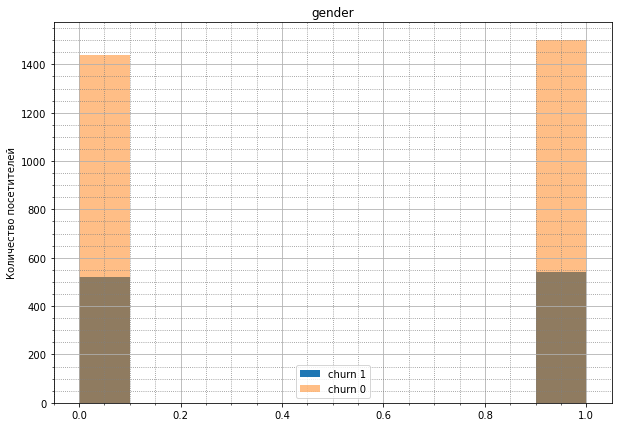

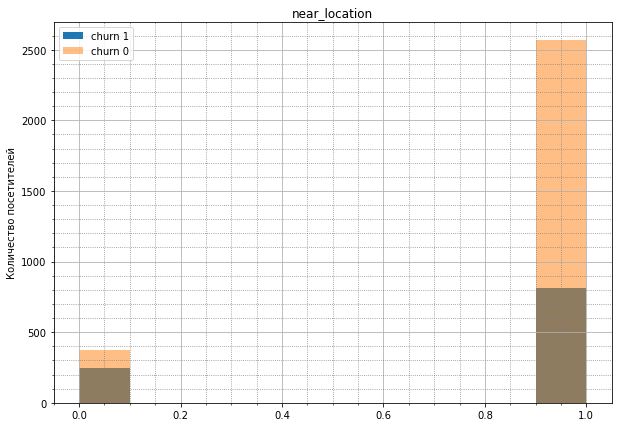

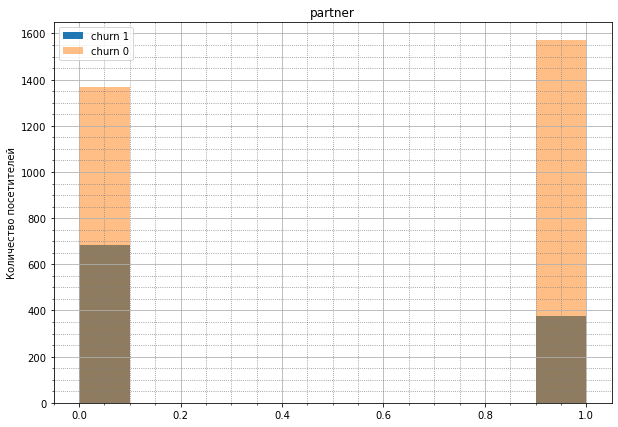

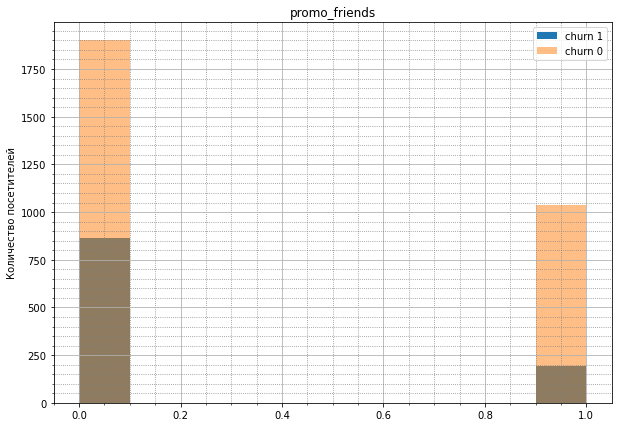

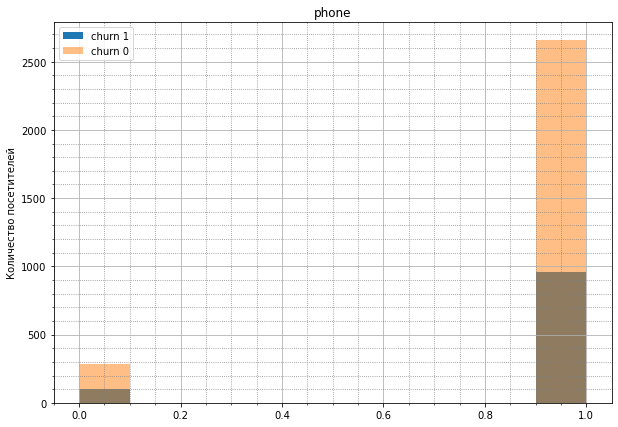

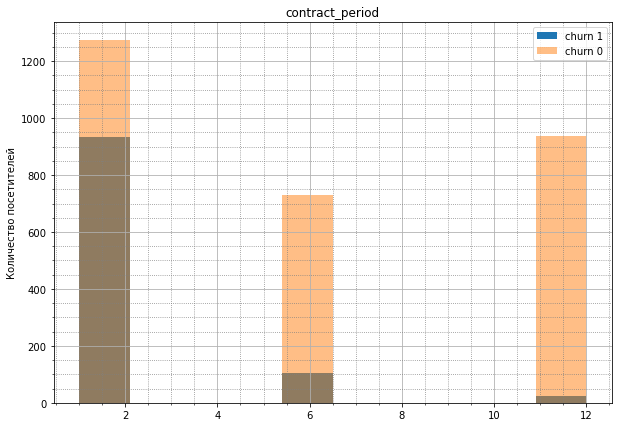

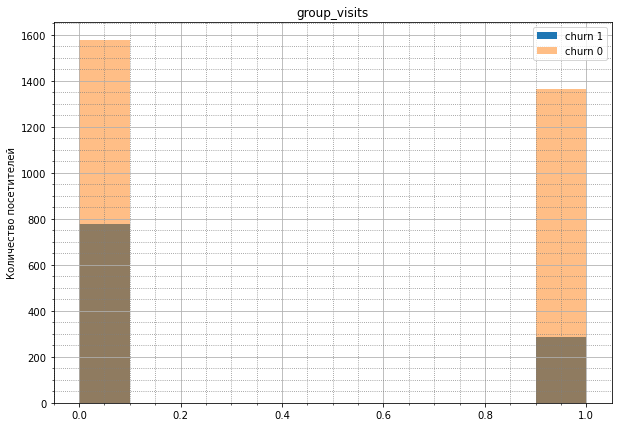

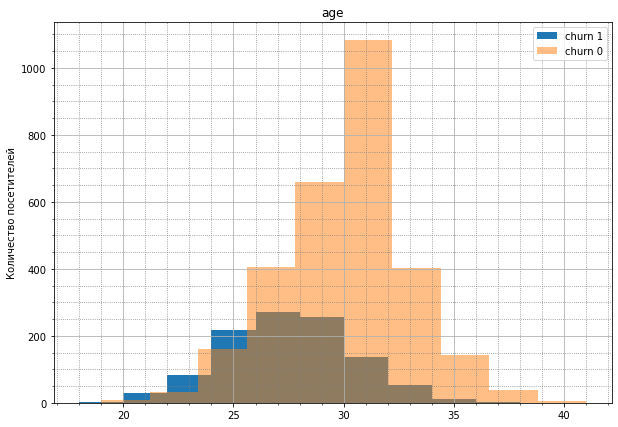

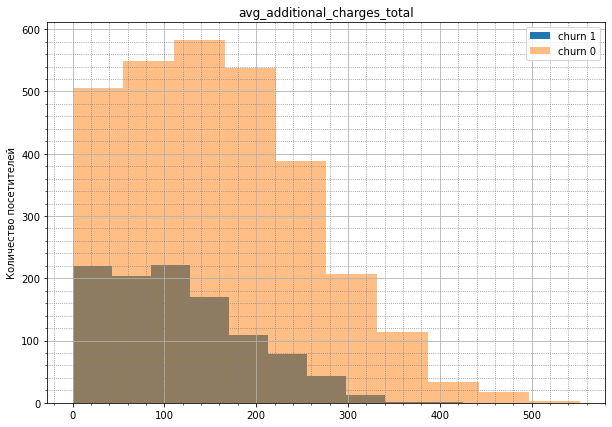

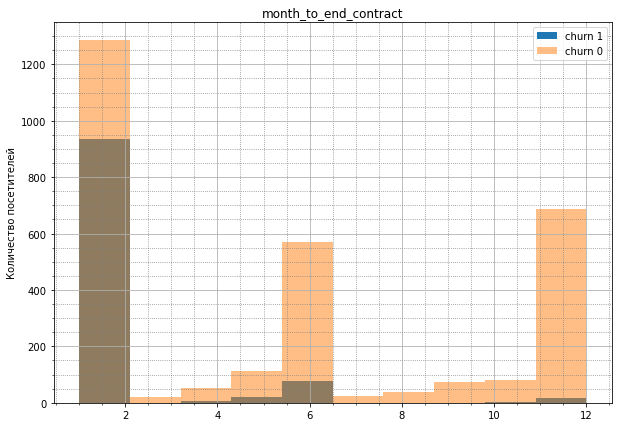

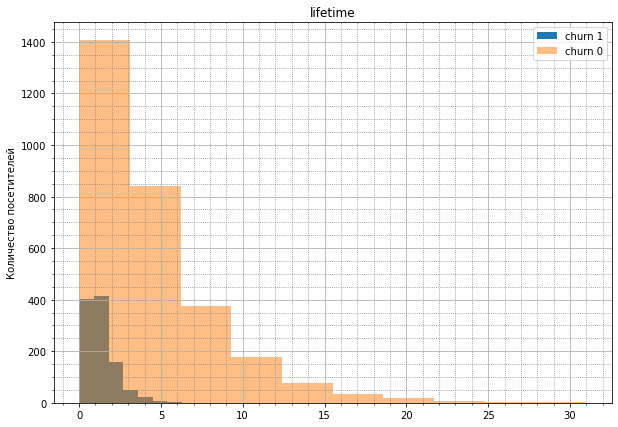

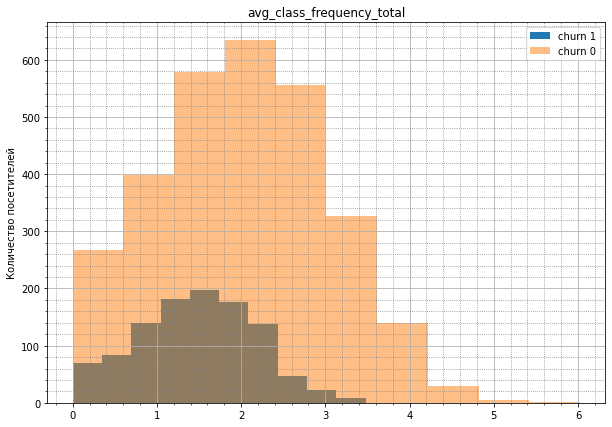

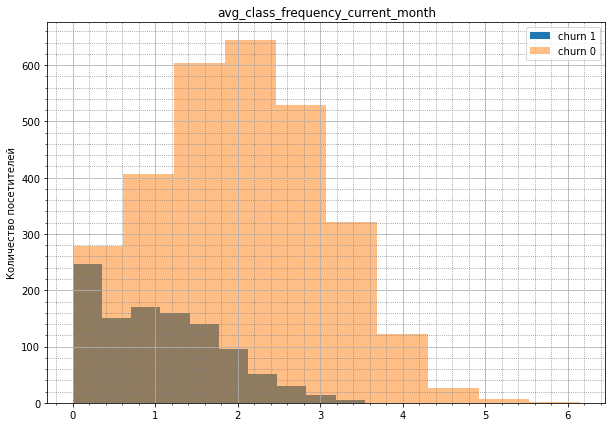

In [7]:
for colum_name in df_mean.columns:
    plt.figure(figsize=(10,7))
    plt.hist(df[df['churn']==1][colum_name], label='churn 1')
    plt.hist(df[df['churn']==0][colum_name], label='churn 0', alpha = 0.5)
    plt.legend()
    plt.title(colum_name)
    plt.grid(which='major')
    plt.minorticks_on()
    plt.grid(which='minor',color = 'gray',linestyle = ':')
    plt.ylabel('Количество посетителей')
    plt.show;

ВЫВОД:

Распределения также показали, что большинсво показателей выше у тех пользователе, кто не попал в отток. Интересным оказалось, что пик распределения по возрасту у тех, кто попал в отток приходится на 27 лет, а у тех, кто остался на 31. И действительно, люди с возрастом более вдумчиво подходят к решению любых вопросов, в том числе в вопросе бросать занятия спортом или нет.

### 2.4 Матрица корреляций

<AxesSubplot:>

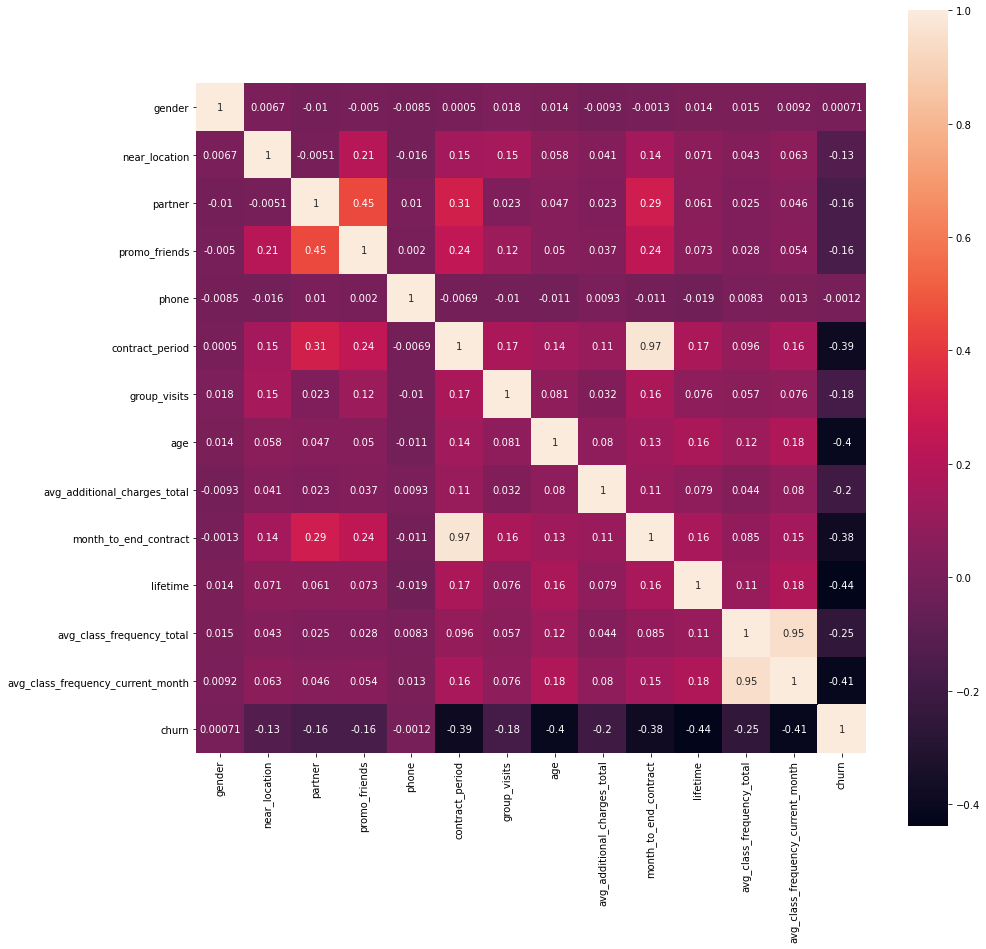

In [8]:
cm = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, square=True)

ВЫВОД:

Наиболе коррелирующие признаки: 
- 'avg_class_frequency_current_month' - 'avg_class_frequency_total'
- 'month_to_end_contract' - 'contract_period'

## 3. Модель прогнозирования оттока клиентов
Бинарная модель, целевой признак - факт оттока клиентов.
### 3.1 Разбивка данных на обучающую и валидационную выборку

In [9]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop(columns=['churn'])
y = df['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.2 Обучение модели способом логической регрессии

In [10]:
model_l = LogisticRegression(random_state=0) 

model_l.fit(X_train, y_train)



LogisticRegression(random_state=0)

### 3.3 Обучение модели способом случайный лес

In [11]:
model_f = RandomForestClassifier(random_state=0) 

model_f.fit(X_train, y_train)



RandomForestClassifier(random_state=0)

### 3.4 Сравнение моделей на основании метрик  accuracy, precision и recall для обеих моделей на валидационной выборке

In [12]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions_l = model_l.predict(X_test)
probabilities_l = model_l.predict_proba(X_test)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    predictions_l,
    probabilities_l,
    title='Метрики для модели логистической регрессии:',
)


Метрики для модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.79


In [13]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
predictions_f = model_f.predict(X_test) # Ваш код здесь
probabilities_f = model_f.predict_proba(X_test)[:, 1]  # Ваш код здесь
# выведем все метрики
print_all_metrics(
    y_test,
    predictions_f,
    probabilities_f, 
    title='Метрики для модели случайного леса:'
)

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82


ВЫВОД:

По всем метрикам незначительно лучше работает логическая регрессия. Однако, в общем, можно сказать, что обе модели работают достаточно хорошо.

## 4. Кластеризация клиентов
### 4.1 Стандартизация данных

In [14]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(df.drop(columns = ['churn']))

### 4.2 Мтрица расстояний на стандартизованной матрице признаков и построение дендрограммы, определение количества кластеров

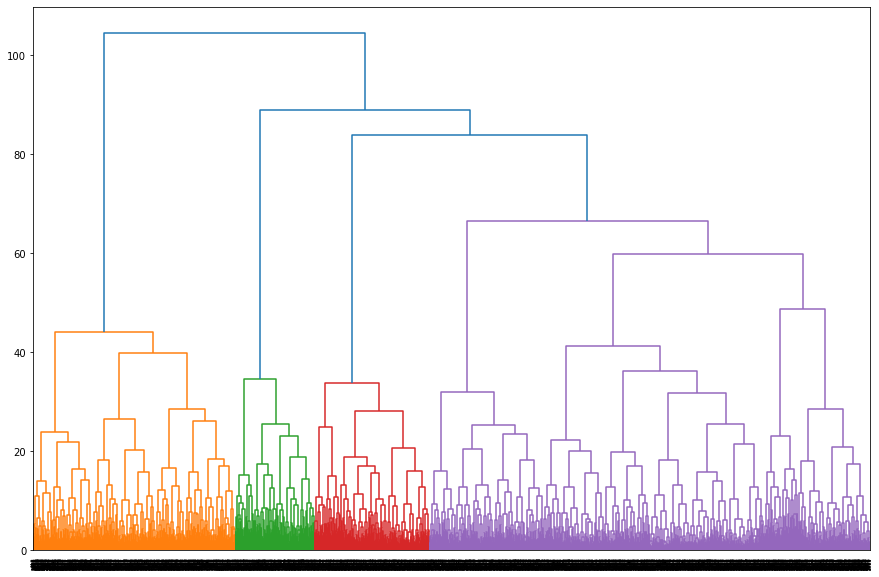

In [15]:
linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

ВЫВОД:

Явно просматривается 4 кластера.

### 4.3 Обучение модели кластеризации на основании алгоритма K-Means и прогноз кластеров клиентов

In [16]:
km = KMeans(n_clusters = 5, random_state=0)
labels = km.fit_predict(x_sc)

### 4.4 Оценка среднего значения признаков для кластеров

In [17]:
df['cluster_km'] = labels

ch = df.groupby('cluster_km').mean()
ch

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Наиболее заметны различия между кластерами по средним значениям следующих признаков:
- promo_friends
- contract_period 
- month_to_end_contract	

По 0 кластеру максимальные значения во всех трех признаках

По 1 кластеру все признаки в 2 раза ниже, относительно 0-го

По 2 кластеру  promo_friends минимально (меньше 8%), contract_period около среднего (2.3 мес), и month_to_end_contract также около среднего (2.1 мес)

По 3  и 4 кластеры схожи, promo_friends среднее (24% и 22% соответсвенно), contract_period около среднего (1.9 и 2.7 мес соответсвенно), month_to_end_contract также около среднего (1.8 и 2.4 мес соответсвенно)

### 4.5 Оценка распределения признаков для кластеров

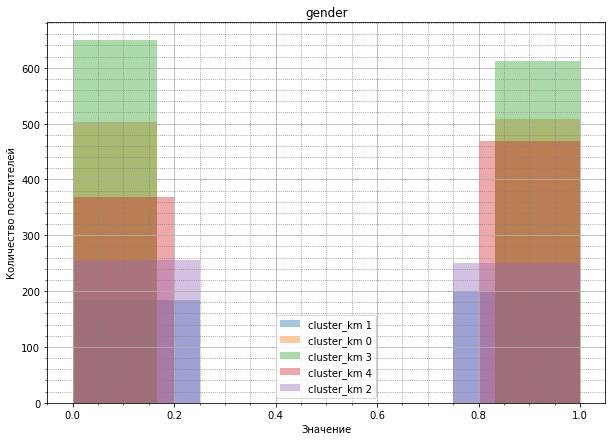

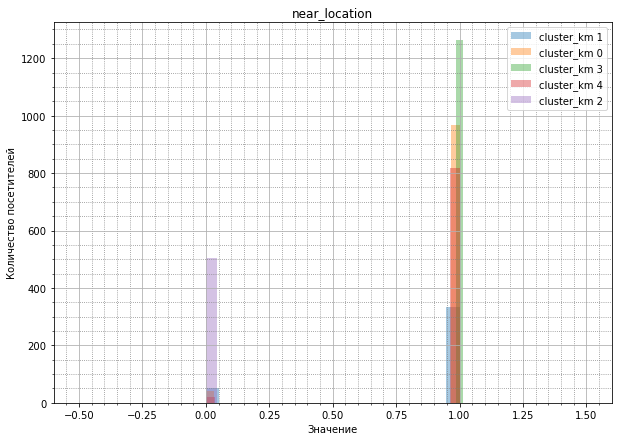

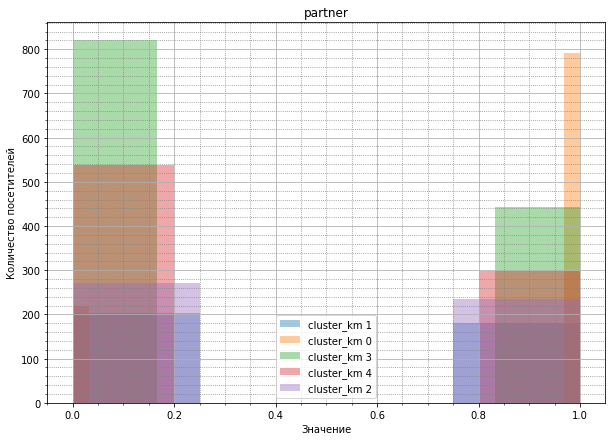

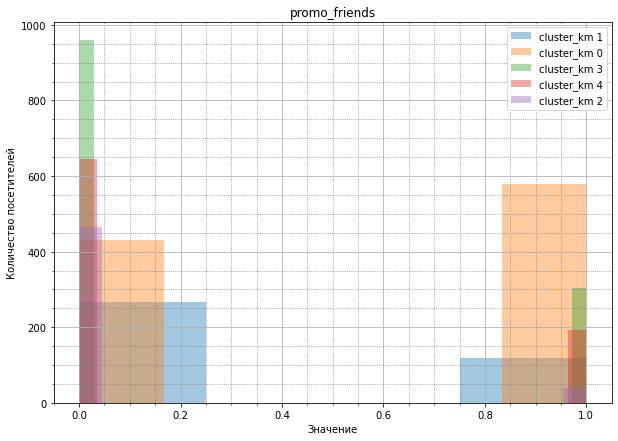

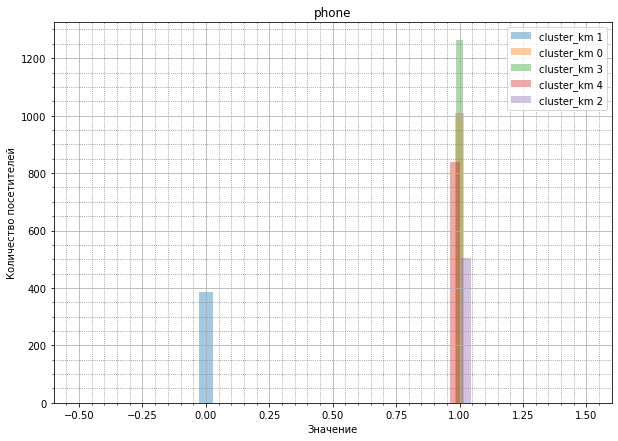

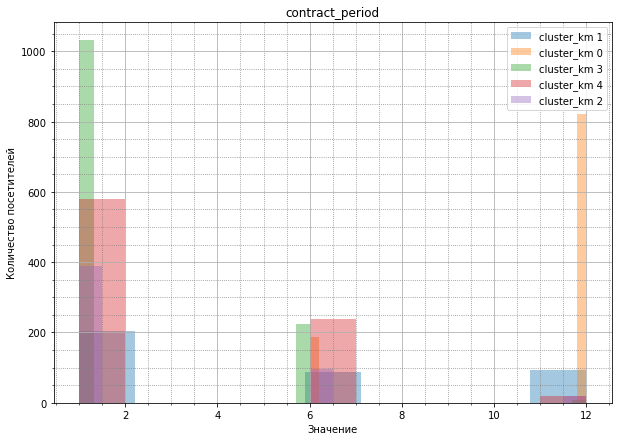

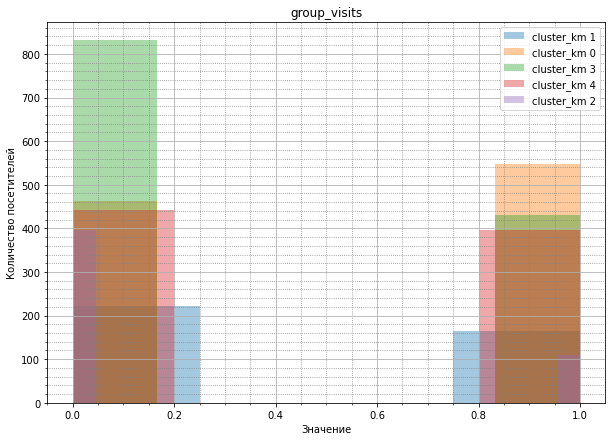

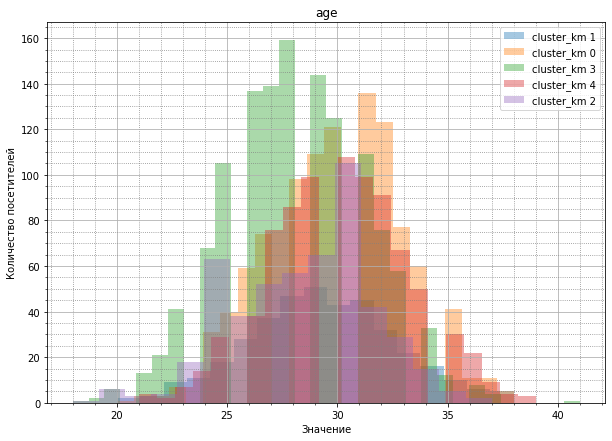

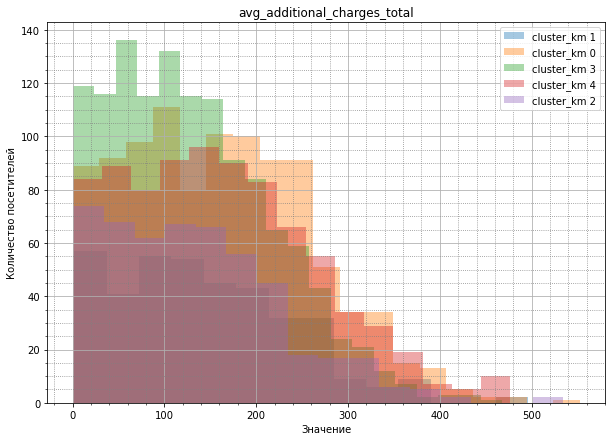

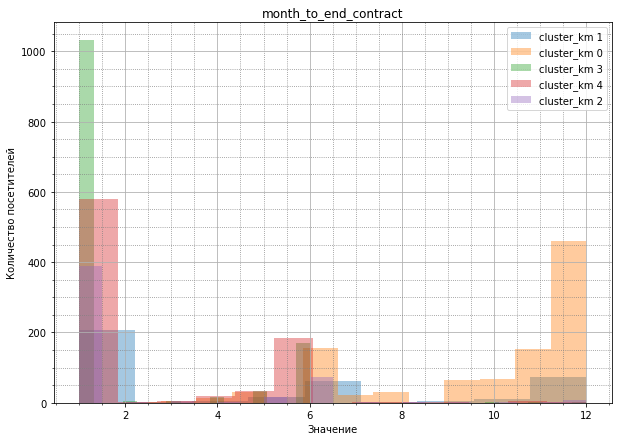

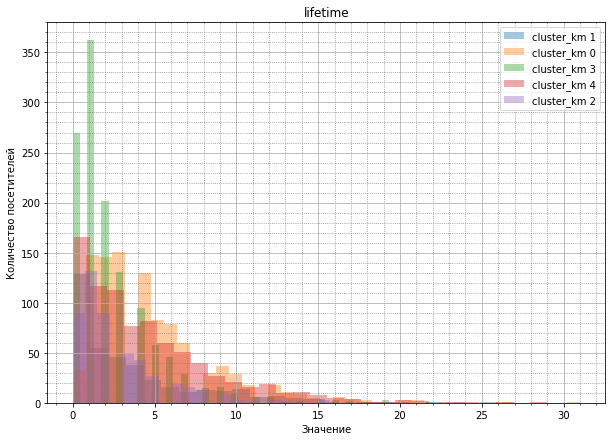

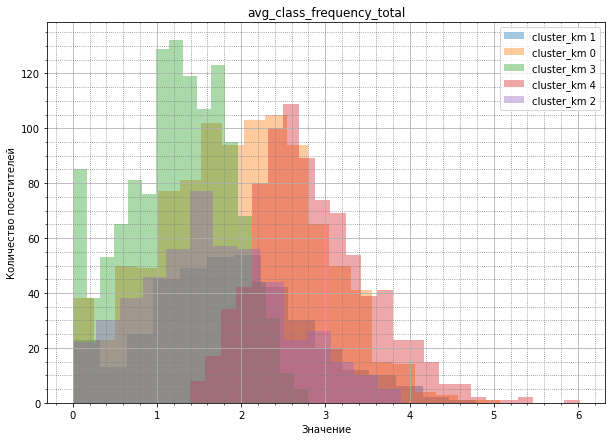

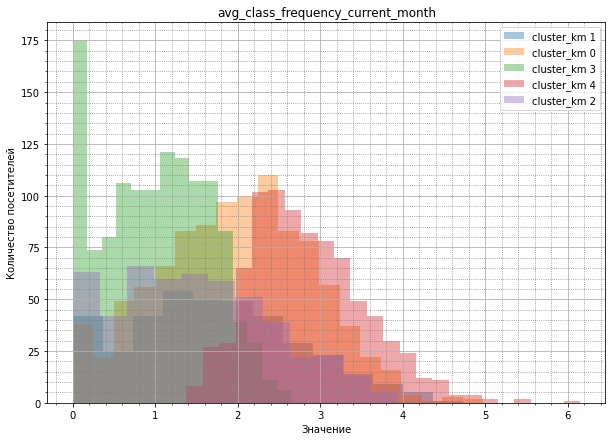

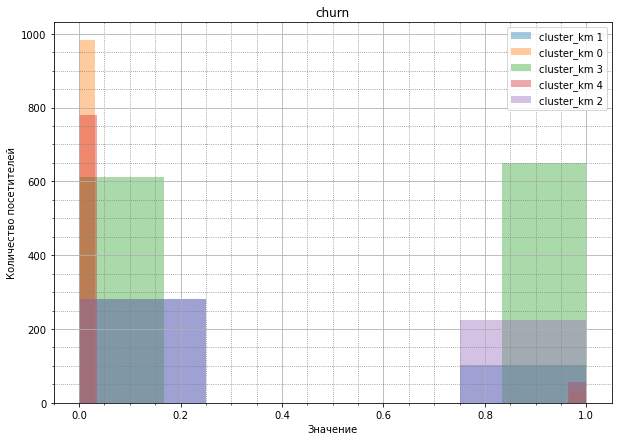

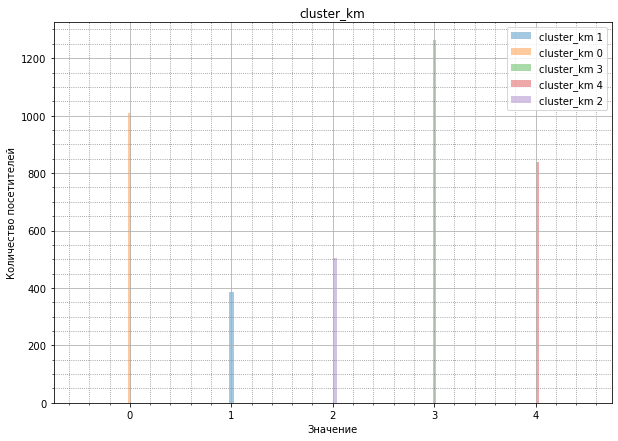

In [18]:
for colum_name in df.columns:
    plt.figure(figsize=(10,7))    
    for i in df['cluster_km'].unique():
        sns.distplot(df[df['cluster_km'] == i][colum_name],
                    label='{} {}'.format('cluster_km', str(i)),
                    kde=False
                    )
    plt.ylabel('Количество посетителей')
    plt.xlabel('Значение')
    plt.grid(which='major')
    plt.minorticks_on()
    plt.grid(which='minor',color = 'gray',linestyle = ':')
    plt.title(colum_name)
    plt.legend()
    plt.show()


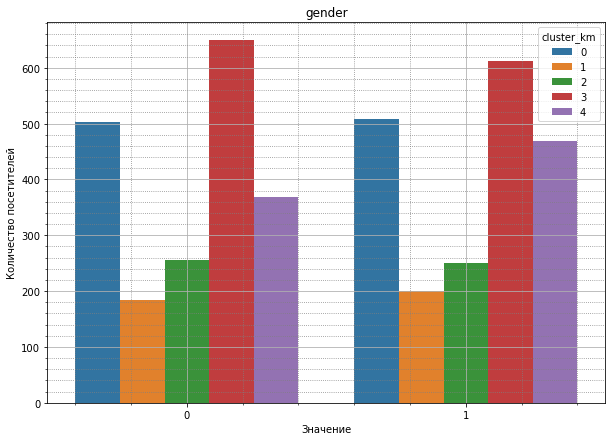

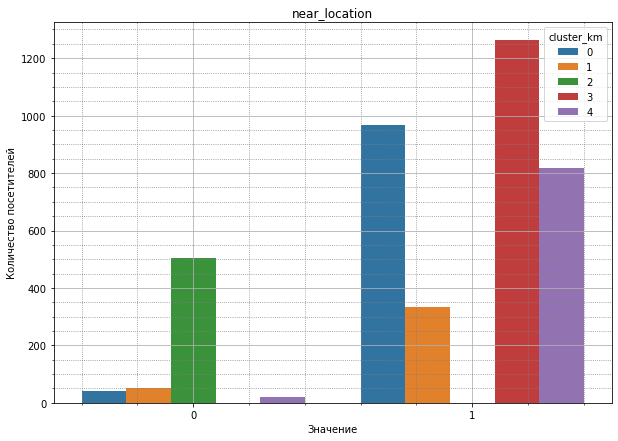

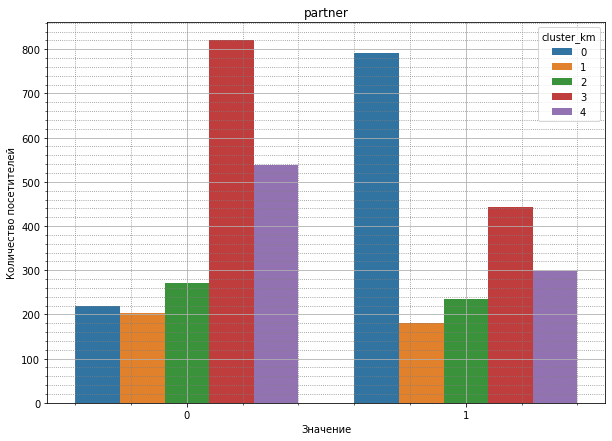

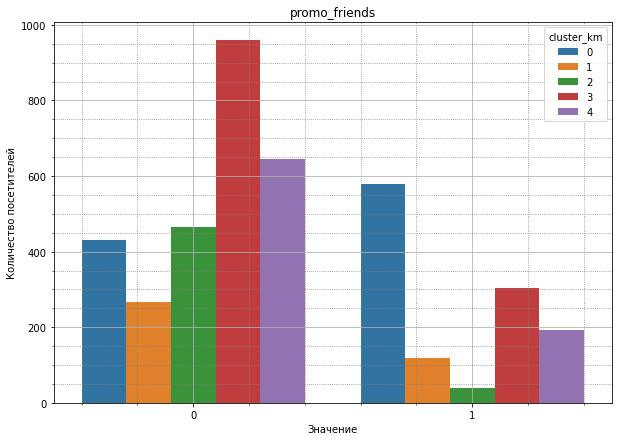

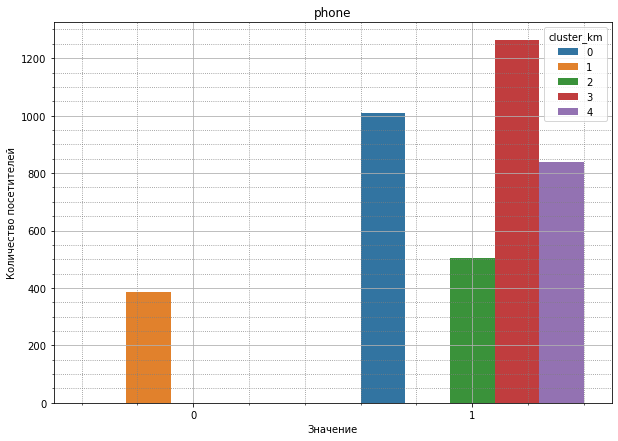

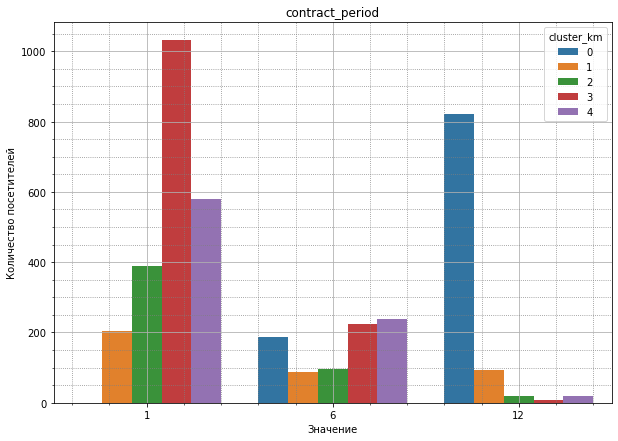

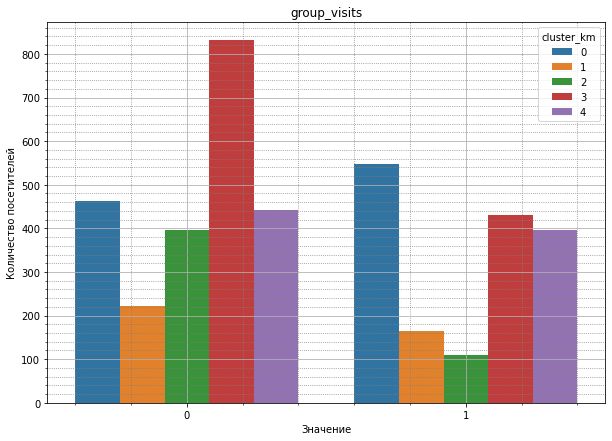

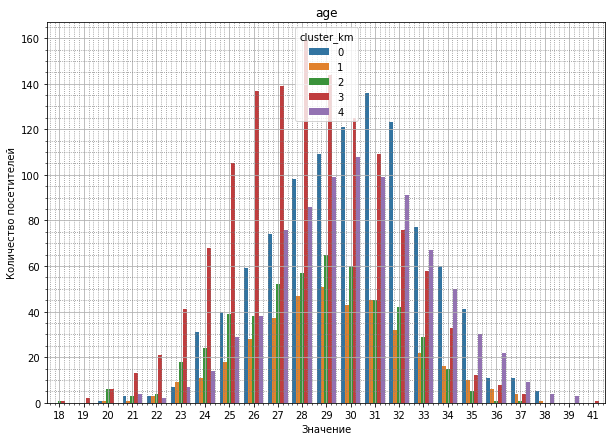

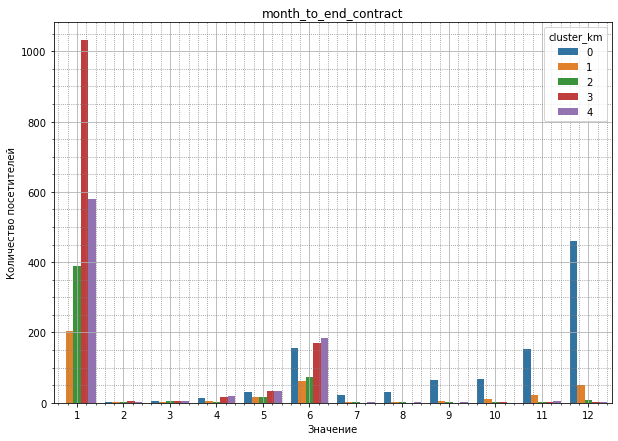

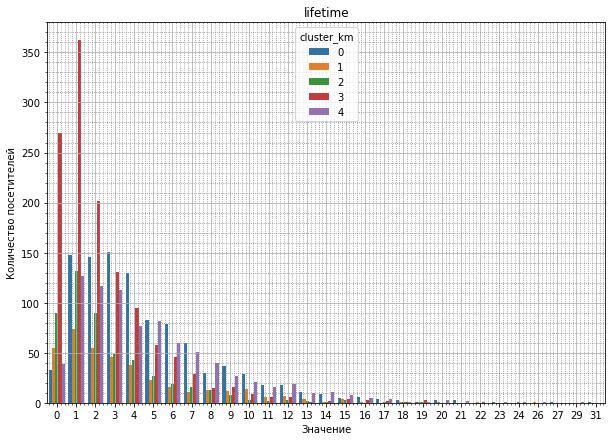

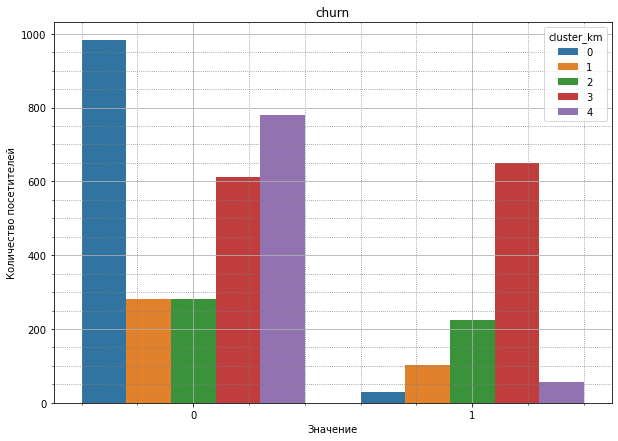

In [19]:
col_d=['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
        'month_to_end_contract', 'lifetime','churn']
col_n=['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

for colum_name in col_d:
    plt.figure(figsize=(10,7))    
    sns.countplot(data = df, x = colum_name, hue = 'cluster_km')
    plt.ylabel('Количество посетителей')
    plt.xlabel('Значение')
    plt.grid(which='major')
    plt.minorticks_on()
    plt.grid(which='minor',color = 'gray',linestyle = ':')
    plt.title(colum_name)
    plt.show()

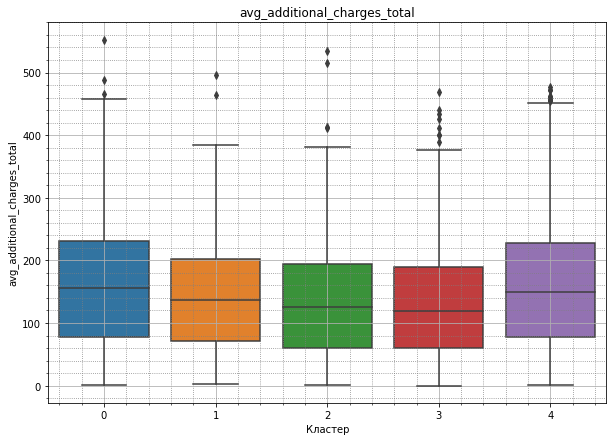

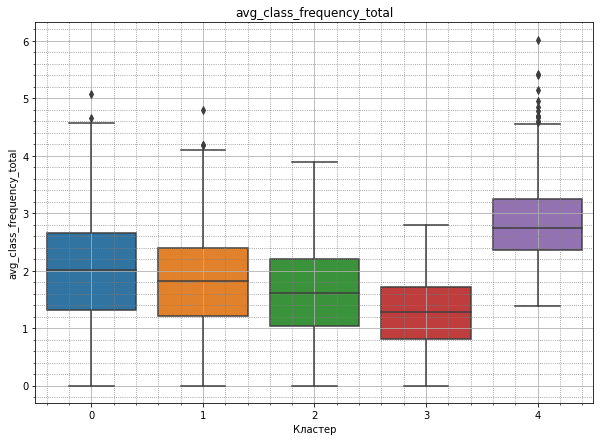

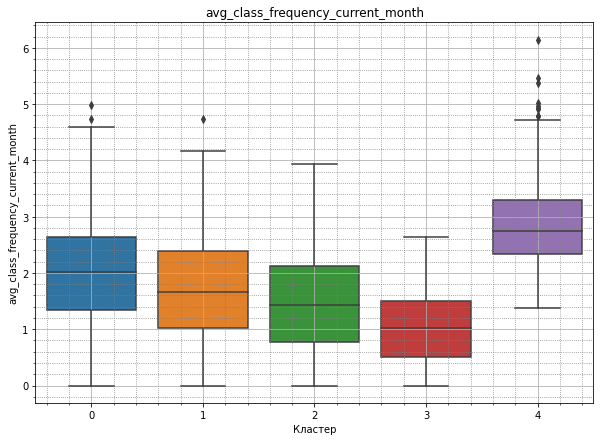

In [20]:
for colum_name in col_n:
    plt.figure(figsize=(10,7))    
    sns.boxplot(x = 'cluster_km', y = colum_name, data = df)
    plt.xlabel('Кластер')
    plt.grid(which='major')
    plt.minorticks_on()
    plt.grid(which='minor',color = 'gray',linestyle = ':')
    plt.title(colum_name)
    plt.show()

Распределения большинства признаков идентичны, но наиболее наглядны различия по кластерам следующих признаков:
- near_location
- month_to_end_contract
- avg_class_frequency_total
- avg_class_frequency_current_month

Обнаружены следующие закономерности:
- Меньше остальных уходят в отток посетители, которые только приобрели абонимент на 12 мес, но по окончании годового абонимента большинство попадает в отток.
- Чем выше частота посещений в предыдущем месяце, а также суммарная выручка от сопутсвующих услуг тем ниже вероятность поподания в отток.
- Пользователи, которые не оставили номер телефона, а также записаны не в рамках акции "приведи друга", с большей вероятностью поподают в отток.
- Признаки near_location и partner мало влияют на поподание в отток.

### 4.6 Оценка доли отттока

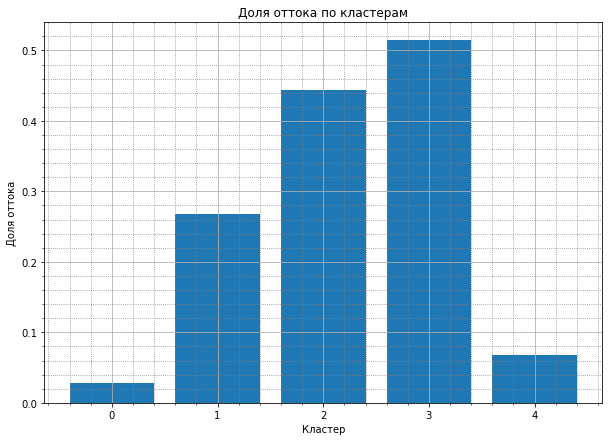

In [21]:
plt.figure(figsize=(10,7))
plt.bar(ch.index,ch['churn'])
plt.title('Доля оттока по кластерам')
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor',color = 'gray',linestyle = ':')
plt.ylabel('Доля оттока')
plt.xlabel('Кластер')
plt.show;

ВЫВОД:

Кластеры 2 и 3 наиболее склонны к оттоку. Кластеры 0 и 4 наиболее надежны.

## 5. Выводы и рекомендации по работе с клиентами

- Около 85% посетителей живут или работают в районе фитнес клуба, однако этот показатель мало влияет на отток.
- Групповые занятия Снижают вероятность попадания в отток.
- Для прогнозирования оттока клиентов достаточно хорошо работают методы линейной регрессии и случайный лес.
- Чем выше частота посещений в предыдущем месяце, а также суммарная выручка от сопутсвующих услуг тем ниже вероятность поподания в отток.
- Пользователи, которые не оставили номер телефона, а также записаны не в рамках акции "приведи друга", с большей вероятностью поподают в отток.

РЕКОМЕНДАЦИИ:

- Стоит увеличить посещаемость групповых занятий. Возможно, стоит добавить новые виды занятий и пригласить именитых тренеров.
- При выдаче абонимента фиксировать телефон каждого посетителя, давая бонус в замен (например бесплатная неделя посещений сверх абонимента).
- Если у посетителя упала посещаемость в предыдущем месяце, стоит завлечь его обратно, например, акцией или анонсом новых групповых тренеровок.
- К окончанию длительного абонимента (6, 12 мес) активность посещений сильно ниже, чем в самом начале срока абонимента. Поэтому нужно возращать уровень посещаймости в конце, чтобы посетитель не попал в отток, а продлил абонимент.